In [1]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
in_shape = (28, 28, 1)
out_size = 10

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 153s 321ms/step - loss: 0.4600 - accuracy: 0.8572 - val_loss: 0.0521 - val_accuracy: 0.9830
Epoch 2/12
469/469 [==============================] - 77s 164ms/step - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.0367 - val_accuracy: 0.9874
Epoch 3/12
469/469 [==============================] - 76s 162ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0381 - val_accuracy: 0.9867
Epoch 4/12
469/469 [==============================] - 84s 178ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 5/12
469/469 [==============================] - 87s 185ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 6/12
469/469 [==============================] - 86s 183ms/step - loss: 0.0464 - accuracy: 0.9869 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 7/12
469/469 [==============================] - 77s 164ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0347 - val_a

In [6]:
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

313/313 [==============================] - 4s 12ms/step - loss: 0.0383 - accuracy: 0.9888
正解率= 0.9887999892234802 loss= 0.038282159715890884


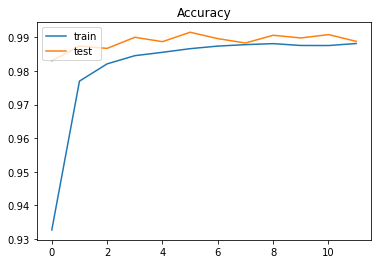

In [7]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

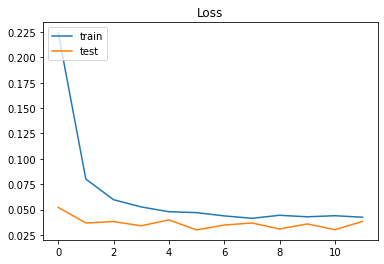

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()